In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
#!wget https://www.kaggle.com/datasets/shayanfazeli/heartbeat/?select=ptbdb_normal.csv
#!wget https://www.kaggle.com/datasets/shayanfazeli/heartbeat/?select=ptbdb_anormal.csv




#Contexte
"ECG Heartbeat Categorization Dataset", https://www.kaggle.com/datasets/shayanfazeli/heartbeat/. Ce jeu de données est construit à partir de deux ensembles de données de classification des battements cardiaques reconnus : la base de données d'arythmie MIT-BIH et la base de données d'ECG diagnostique PTB.On s'interesse ici a la base de données d'ECG diagnostique PTB.
Voici quelques détails à son sujet :

Format : Fichier CSV (valeurs séparées par des virgules)
Contenu : Chaque ligne du fichier représente  un battement cardiaque unique . Les données s'y trouvant sont des valeurs numériques représentant l'activité électrique du coeur mesurée à intervalles réguliers (187s) pour des cas normaux et anormaux.
# **But:**
Entrainer les auto encodeurs sur les ecg normaux pour pouvoir detecter les cas anormaux en se basant sur les erreurs de reconstitution apres decodages.
Un auto-encodeur peut apprendre à quoi ressemble un ecg normal et, lorsqu’un ecg anormal lui est présenté, il ne pourra pas la reproduire correctement, signalant ainsi qu’il y a un problème. Cela fonctionne comme un contrôleur  qui sait reconnaître les écarts par rapport à la norme.

In [10]:
dataset0=pd.read_csv("/content/ptbdb_normal.csv",header=None)

In [11]:
dataset1=pd.read_csv("/content/ptbdb_abnormal.csv",header=None)

In [12]:
dataset0.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualisation des ecgs anormaux

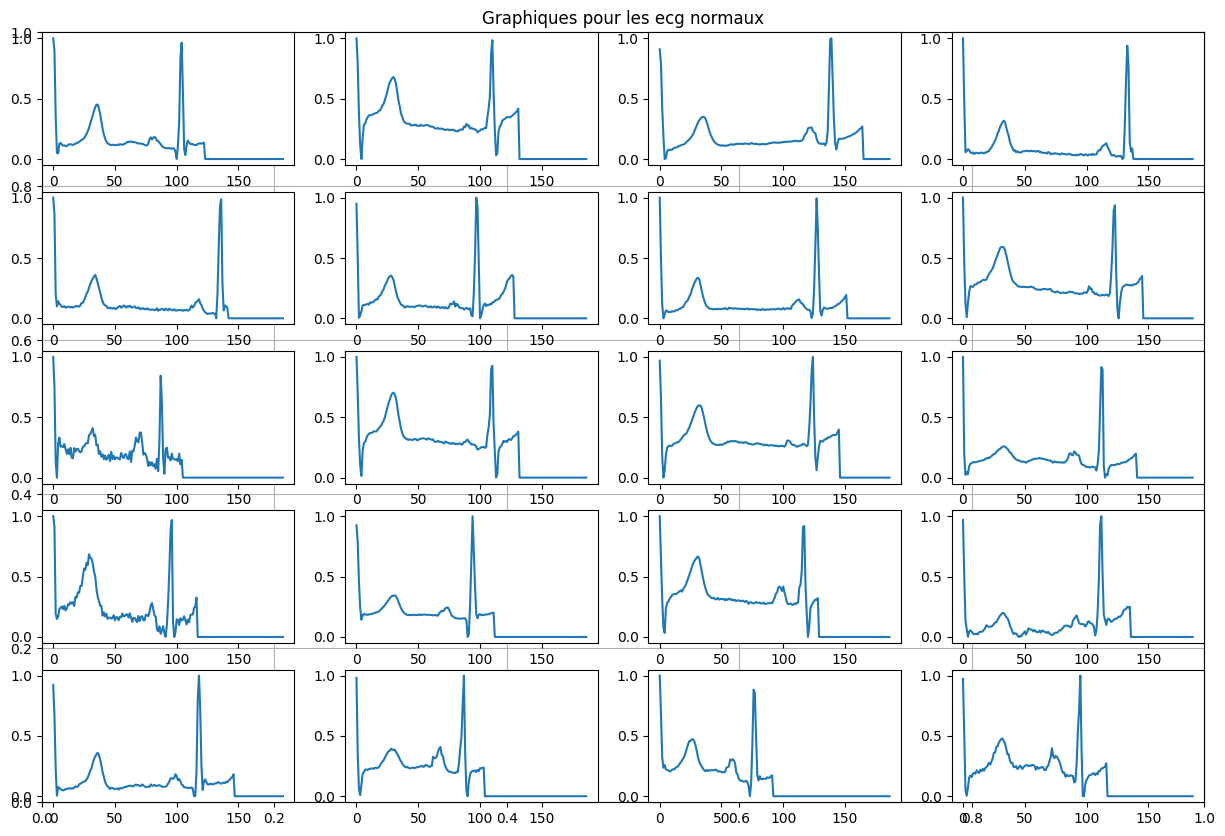

In [13]:
dataset0.iloc[:1,:]
plt.figure(figsize=(15,10))
plt.title("Graphiques pour les ecg normaux" )
plt.grid()
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.plot(np.arange(187).reshape(-1,1),dataset0.iloc[i:i+1,:-1].T)

Visualisation des ecgs anormaux

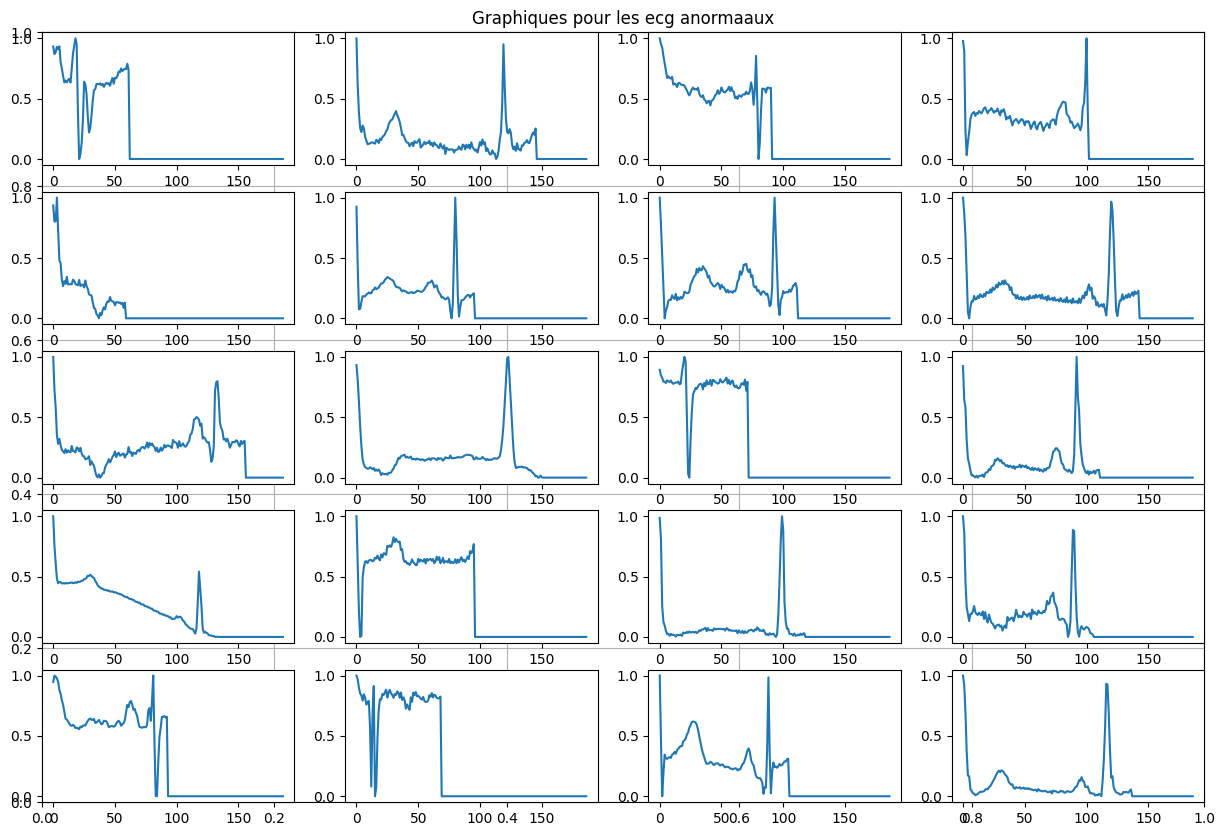

In [14]:
plt.figure(figsize=(15,10))
plt.grid()
plt.title("Graphiques pour les ecg anormaaux" )
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.plot(np.arange(187).reshape(-1,1),dataset1.iloc[i:i+1,:-1].T)

In [15]:
dataset1.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.0,1338.0,1338.0,1338.0
mean,0.974594,0.725918,0.443202,0.297006,0.255240,0.250503,0.246260,0.246794,0.249099,0.251371,...,0.000907,0.000925,0.000732,0.000800,0.000694,0.000402,0.0,0.0,0.0,1.0
std,0.036567,0.203191,0.268942,0.274082,0.240209,0.215801,0.203577,0.196717,0.193800,0.191562,...,0.017283,0.017402,0.016055,0.017376,0.016349,0.012101,0.0,0.0,0.0,0.0
min,0.765013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
25%,0.954290,0.587777,0.230890,0.082132,0.091227,0.098512,0.096674,0.096152,0.100363,0.098941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
50%,1.000000,0.747992,0.407583,0.218874,0.174533,0.176020,0.179572,0.190537,0.196333,0.198400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
75%,1.000000,0.893548,0.629837,0.430008,0.344616,0.335924,0.336384,0.347981,0.357838,0.367819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,0.997738,1.000000,1.000000,0.985523,0.976615,0.953229,...,0.463821,0.450072,0.473951,0.516643,0.465991,0.429088,0.0,0.0,0.0,1.0


In [16]:
np.unique(dataset0[187])
np.unique(dataset1[187])

array([ 1., nan])

In [17]:
dataset0.drop_duplicates(inplace=True)
X_norm=dataset0.drop(187,axis=1)
X_anorm=dataset1.drop(187,axis=1)

In [18]:
X_norm.shape

(3123, 187)

Strucutre de l'autoencodeur

In [19]:
input_dim=X_norm.shape[1]
encoder=tf.keras.Sequential([tf.keras.layers.Dense(88,activation="relu",input_shape=(input_dim,)),
                     tf.keras.layers.Dense(44,activation="relu"),
                     tf.keras.layers.Dense(18,activation="relu")
                     ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:

decoder=tf.keras.Sequential([tf.keras.layers.Dense(44,activation="relu",input_shape=(18,)),
                     tf.keras.layers.Dense(88,activation="relu"),
                     tf.keras.layers.Dense(input_dim,activation="relu")
                     ])

In [21]:
autoencoder=tf.keras.Sequential([encoder,decoder])

In [22]:
autoencoder.compile(loss="mse", optimizer="adam")

In [23]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 88)                  │          16,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 44)                  │           3,916 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,270 (83.09 KB)

 Trainable params: 21,270 (83.09 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 44)                  │             836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 88)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 187)                 │          16,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,439 (83.75 KB)

 Trainable params: 21,439 (83.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 18)                  │          21,270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 187)                 │          21,439 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,709 (166.83 KB)

 Trainable params: 42,709 (166.83 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
autoencoder.fit(X_norm[:3000], X_norm[:3000], epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0489
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0124
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 
Epoch 16/50
12/1

In [25]:
print(X_anorm.shape)
print(input_dim)
p_anorm=autoencoder.predict(np.array(X_anorm)[0].reshape(1,187))
p_norm=autoencoder.predict(np.array(X_norm)[3002].reshape(1,187))

(1339, 187)
187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [26]:
X_norm.shape

(3123, 187)

In [27]:
X_anorm.shape

(1339, 187)

In [28]:
import numpy


In [29]:
p_anorm=np.array(p_anorm).reshape(187,)
p_norm=np.array(p_norm).reshape(187,)



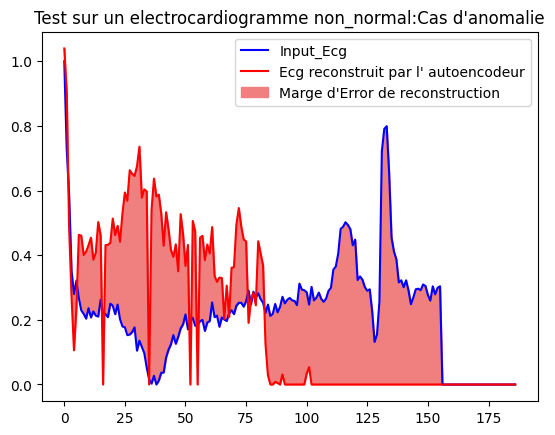

In [94]:
i=8
plt.plot(np.array(X_anorm)[i], 'b',markersize=10)
plt.plot(p_anorm, 'r')
plt.fill_between(np.arange(187), np.array(X_anorm)[i], p_anorm, color='lightcoral', label="Marge d'Error de reconstruction")
plt.legend(labels=["Input_Ecg", "Ecg reconstruit par l' autoencodeur","Marge d'Error de reconstruction"])
plt.title("Test sur un electrocardiogramme non_normal:Cas d'anomalie")
plt.show()


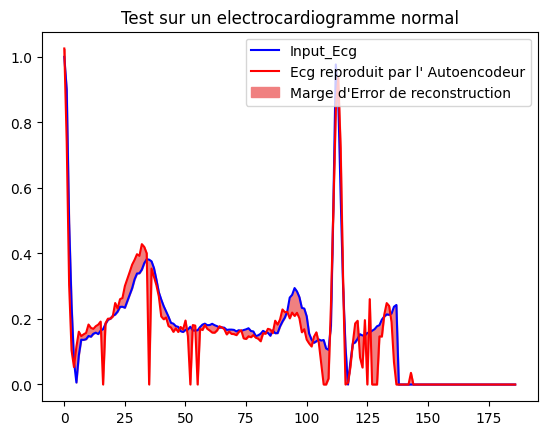

In [77]:
j=3118
j=3002
plt.plot(np.array(X_norm)[j], 'b')
plt.plot(p_norm, 'r')
plt.fill_between(np.arange(187),p_norm, np.array(X_norm)[j], color='lightcoral')
plt.legend(labels=["Input_Ecg", "Ecg reproduit par l' Autoencodeur", "Marge d'Error de reconstruction"])
plt.title("Test sur un electrocardiogramme normal")
plt.show()


# **Important à savoir:**

Dans un contexte de classification ou on a des données avec une classe surrepresentée,il serait inadequat d'utiliser une technique d'apprentissage supervisé classique pour resoudre ce probleme en raison des riques evidentes de biais lié dans ce cas a la mauvaise repartition des classes
au sein de l'echantillon.Une technique d'autoencodage s'avere efficace sur ce probleme puisqu'on est en mesure d'apprendre des reseaux de neurones sur une classe particuliere de données et de faire des predictions de n'importe quelle classe en se basant sur les erreurs de reconstruction.